# 2.8.2. Ejemplo 2.5

|Quién | Correo | Fecha | Qué hizo |
| ---  | ---    | ---   | ---      |
|Michael Heredia Pérez | <mherediap@unal.edu.co>  | Julio 14, 2022 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez  | <jnramirezg@unal.edu.co> | Septiembre 18, 2022 | Agregando cálculos de esf. y dir. pples |
|Diego Andrés Alvarez  | <daalvarez@unal.edu.co>  | Febrero 22, 2024 | Mejorando los comentarios |



$$
\newcommand{\ve}[1]{{\vec{\boldsymbol{#1}}}}
\newcommand{\ma}[1]{{\boldsymbol{#1}}}
\newcommand{\hve}[1]{{\,\hat{\!\boldsymbol{#1}}}}
$$

Consideremos un punto $P$ de un sólido sometido los esfuerzos:

$\sigma_x=1$ Pa, 

$\sigma_y=3$ Pa,

$\sigma_z = \tau_{xy} = \tau_{xz} = 0$ Pa,

$\tau_{yz}= 2$ Pa.

Se pide:

* Plantear la matriz de tensiones $\ma{\sigma}$ correspondiente.
* Calcular el polinomio característico asociado a $\ma{\sigma}$.
* Calcular la dirección y magnitud de los esfuerzos principales.

 Importamos algunas funciones necesarias de ```numpy``` e importamos el submódulo ```linalg``` de ```numpy``` (álgebra lineal).

In [1]:
from numpy import array, poly, roots, arctan, rad2deg, cross, column_stack, sort, c_
from numpy.linalg import eigh, norm, det

## Matriz de tensiones
Definimos las componentes de esfuerzos dadas como variables numéricas:

In [2]:
sx,   sy,  sz = 1, 3, 0  # [Pa]
txy, txz, tyz = 0, 0, 2  # [Pa]

Definimos la matriz de tensiones $\ma{\sigma}$ en tres dimensiones:

In [3]:
sigma = array([[sx,  txy, txz],
               [txy,  sy, tyz],
               [txz, tyz,  sz]])
sigma

array([[1, 0, 0],
       [0, 3, 2],
       [0, 2, 0]])

## Polinomio característico

Obtenemos los coeficientes del polinomio característico mediante ```numpy.poly()```:

In [4]:
poly(sigma)

array([ 1., -4., -1.,  4.])

Pero como el polinomio que definimos en el <font color='blue'>main.pdf</font> tiene la forma $-\sigma_n^3+I_1\sigma_n^2-I_2\sigma_n+I_3 = 0$, multiplicamos por -1:

In [5]:
pol = -poly(sigma)

pol

array([-1.,  4.,  1., -4.])

Lo interpretamos como:
$$-\sigma_n^3+ 4\sigma_n^2 + \sigma_n -4=0$$.

Así, los invariantes de esfuerzos son $I_1 =4Pa$, $I_2=-1Pa^2$ y $I_3=-4Pa^3$.

Y mediante la función ```numpy.roots()``` calculamos la raíces del polinomio característico, es decir, los esfuerzos principales:

In [6]:
esf_ppales = sort(roots(pol))  # sort() los ordena de menor a mayor
esf_ppales

array([-1.,  1.,  4.])

No olvidar que debemos garantizar por definición en el <font color='blue'>main.pdf</font> que:
$$\sigma_1 \geq \sigma_2 \geq \sigma_3$$

Por lo que a la hora de definir los esfuerzos principales en variables ```s1```, ```s2``` y ```s3``` debemos prestar atención.

Procedemos a graficar el polinomio característico:

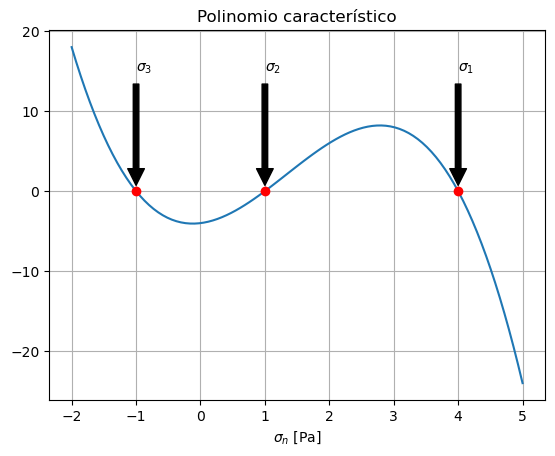

In [7]:
import matplotlib.pyplot as plt
from numpy import polyval, linspace

sigman = linspace(-2, 5, 100)
p = polyval(pol, sigman)
plt.plot(sigman, p)
plt.grid('on')
plt.plot(esf_ppales, [0, 0, 0], 'ro')
plt.annotate(r'$\sigma_3$', xy=(esf_ppales[0], 0), xytext=(esf_ppales[0], 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(r'$\sigma_2$', xy=(esf_ppales[1], 0), xytext=(esf_ppales[1], 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(r'$\sigma_1$', xy=(esf_ppales[2], 0), xytext=(esf_ppales[2], 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Polinomio característico')
plt.xlabel(r'$\sigma_n$ [Pa]')
plt.show()

## Esfuerzos y direcciones principales

Es posible calcular simultáneamente los valores ```valp``` y vectores propios ```vecp``` (esfuerzos y direcciones principales) con la función ```numpy.linalg.eigh()```:

In [8]:
valp, vecp = eigh(sigma)

**Nota:** refiérase a la documentación para entender porqué se usa el comando [np.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) en lugar del [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html). La función ```eigh()``` se usa en vez de ```eig()``` debido a que su algoritmo interno está hecho para matrices simétricas, es decir, es más eficiente.

Los valores propios representan la magnitud de los esfuerzos principales $\sigma_1$, $\sigma_2$ y $\sigma_3$:

In [9]:
valp

array([-1.,  1.,  4.])

Almacenamos en memoria como ```s1```, ```s2``` y ```s3```, teniendo en cuenta que $\sigma_1 \geq \sigma_2 \geq \sigma_3$, o sea, $\sigma_1 = 4$Pa, $\sigma_2 = 1$Pa y $\sigma_3 = -1$Pa. En particular, ```eigh()``` genera los valores propios ordenados de menor a mayor.

In [10]:
s3, s2, s1 = valp

Los vectores propios representan las direcciones $\hve{n}_1$, $\hve{n}_2$ y $\hve{n}_3$ de los esfuerzos principales:

In [11]:
vecp

array([[ 0.        ,  1.        , -0.        ],
       [ 0.4472136 ,  0.        , -0.89442719],
       [-0.89442719,  0.        , -0.4472136 ]])

Al valor propio ```s1 = 4``` le asociamos la _columna_ ```[0.0, -0.89442719, -0.4472136]``` como vector propio ```ng1``` (dirección principal 1).

Al valor propio ```s2 = 1``` le asociamos la _columna_ ```[1.0, 0.0, 0.0]]``` como vector propio ```ng2``` (dirección principal 2).

Al valor propio ```s3 = -1``` le asociamos la _columna_ ```[0.0, 0.4472136, -0.89442719]``` como vector propio ```ng3``` (dirección principal 3).

Con el siguiente comando asignamos cada vector propio, a partir de las columnas de `vecp`:

In [12]:
ng3, ng2, ng1 = vecp[:,0], vecp[:,1], vecp[:,2]

Verificamos que ```ng1``` sea unitario, calculando su norma con ```norm()```:

In [13]:
norm(ng1)

0.9999999999999999

Verificamos que ```ng2``` sea unitario, calculando su norma con ```LA.norm()```:

In [14]:
norm(ng2)

1.0

Verificamos que ```ng3``` sea unitario, calculando su norma con ```LA.norm()```:

In [15]:
norm(ng3)

0.9999999999999999

Por lo tanto, ```ng1```, ```ng2``` y ```ng3``` son los vectores unitarios buscados que representan a $\hve{n}_1$, $\hve{n}_2$ y $\hve{n}_3$.

## Verificación 1 del sistema de coordenadas de la mano derecha

Como veremos más adelante, las direcciones principales forman una *base ortonormal*, únicamente nos hace falta verificar que cumplan con la regla de la mano derecha.
En ```numpy``` para hacer un productor cruz, usamos la función ```numpy.cross()```.

In [16]:
cross(ng1, ng2)

array([ 0.        , -0.4472136 ,  0.89442719])

In [17]:
ng3

array([ 0.        ,  0.4472136 , -0.89442719])

En particular, no se cumple con $\hve{n}_1 \times \hve{n}_2 = \hve{n}_3$, pero sí se cumple $\hve{n}_1 \times \hve{n}_2 = -\hve{n}_3$.

De esta manera, para tener una base que cumpla con la regla de la mano derecha, solo es necesario cambiarle el sentido a cualquiera de los tres vectores unitarios. El gráfico que aparece abajo resulta al cambiarle el sentido a $\hve{n}_1$:

In [18]:
ng1 = -ng1

In [19]:
cross(ng1, ng2) - ng3

array([0., 0., 0.])

## Verificación 2 del sistema de coordenadas de la mano derecha

Recuerde que el determinante de la matriz $\ma{T}$ debe ser igual a +1 si las tres columnas forman un sistema de coordenadas de la mano derecha.

Construimos la matriz de transformación $\ma{T}$, teniendo en cuenta que:

$$\ma{T} = \left[\hve{n}_1, \hve{n}_2, \hve{n}_3\right]$$

In [20]:
T = column_stack([ng1, ng2, ng3])  # es equivalente a np.c_[ng1, ng2, ng3]
T

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.89442719,  0.        ,  0.4472136 ],
       [ 0.4472136 ,  0.        , -0.89442719]])

Verificamos que $\det(\ma{T}) = +1$:

In [21]:
det(T)

1.0

## Verificación de la no existencia de esfuerzos cortantes

Para verificar que para el nuevo sistema de coordenadas propuesto, la matriz de esfuerzos transformada $\ma{\sigma}' = \ma{T}^T \ma{\sigma} \ma{T},$ no presenta esfuerzos cortantes hacemos:

In [22]:
sigmaP = T.T@sigma@T

sigmaP.round(5) # se imprimen solo 5 decimales

array([[ 4.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., -1.]])

Esto quiere decir que al inclinar un cubo de acuerdo con las direcciones principales no tendremos esfuerzos cortantes y los únicos esfuerzos observados serán los esfuerzos principales:
    
<img src="fig_sec_2.8.4_ejem_2.5.png" width="600">